Compressive strength or compression strength is the capacity of a material or structure to withstand loads tending to reduce the size, as opposed to tensile strength, which withstands loads tending to elongate.

compressive strength is one of the most important engineering properties of concrete. It is a standard industry practice that the concrete is classified based on grades. This grade is nothing but the Compressive Strength of the concrete cube or cylinder. Cube or Cylinder samples are usually tested under a compression testing machine to obtain the compressive strength of concrete. The test requisites differ from country to country based on the design code.

The concrete compressive strength is a highly nonlinear function of age and ingredients. These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate.

In [1]:
# Importing libraries required

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

%matplotlib inline

In [2]:
#ignore warnings

import warnings
warnings.filterwarnings("ignore")

### Loading the Data

In [3]:
df = pd.read_csv('compresive_strength_concrete+2.csv')

### Step 1: Initial EDA & Data Preparation

In [4]:
df.shape

(1030, 9)

In [5]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


Note:
1. It shows that there are 8 independent variables (cement, slag, fly ash, water, superplastic, coarse agg, age) and one dependent variable (concrete strength MPA).

2. All records are numeric.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

### Step 2: EDA & Data Preprocessing
* What values do you see?
* What distributions do you see?
* What relationships do you see?
* What relationships do you think might benefit the prediction problem?
* What ideas about the domain does the data spark?

In [7]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [8]:
#Renaming columns
df = df.rename(columns = {'Cement (component 1)(kg in a m^3 mixture)' : 'Cement', 
                'Blast Furnace Slag (component 2)(kg in a m^3 mixture)' : 'Slag',
                'Fly Ash (component 3)(kg in a m^3 mixture)' : 'Fly Ash',
                'Water  (component 4)(kg in a m^3 mixture)' : 'Water',
                'Superplasticizer (component 5)(kg in a m^3 mixture)' : 'Superplasticizer',
                'Coarse Aggregate  (component 6)(kg in a m^3 mixture)' : 'Coarse Aggregate',
                'Fine Aggregate (component 7)(kg in a m^3 mixture)' : 'Fine Aggregate',
                'Age (day)' : 'Age',
                'Concrete compressive strength(MPa, megapascals) ' : 'Compressive Strength'})


In [9]:
df.head()

,Cement,Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Compressive Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [10]:
df.tail()

,Cement,Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Compressive Strength
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.40


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Cement                1030 non-null   float64
 1   Slag                  1030 non-null   float64
 2   Fly Ash               1030 non-null   float64
 3   Water                 1030 non-null   float64
 4   Superplasticizer      1030 non-null   float64
 5   Coarse Aggregate      1030 non-null   float64
 6   Fine Aggregate        1030 non-null   float64
 7   Age                   1030 non-null   int64  
 8   Compressive Strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [12]:
#random sample of 5

df.sample(5)

,Cement,Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Compressive Strength
1004,279.8,128.9,100.4,172.4,9.5,825.1,804.9,28,52.83
192,233.8,0.0,94.6,197.9,4.6,947.0,852.2,56,27.66
646,250.2,166.8,0.0,203.5,0.0,977.6,694.1,90,47.71
169,425.0,106.3,0.0,153.5,16.5,852.1,887.1,91,65.20
376,376.0,0.0,0.0,214.6,0.0,1003.5,762.4,28,31.97


In [13]:
# Get an overall sense of the data shape with the mean/median, min, max, q1, q3 values
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
Slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
Fly Ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
Water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
Superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
Coarse Aggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
Fine Aggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
Age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
Compressive Strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [14]:
#Checking for features that have nonzero missing values
df_na = df.isna()
df_na.sum()
# this will show only features that have nonzero missing values
#df_na[df_na!=0]

Cement                  0
Slag                    0
Fly Ash                 0
Water                   0
Superplasticizer        0
Coarse Aggregate        0
Fine Aggregate          0
Age                     0
Compressive Strength    0
dtype: int64

Note: No missing values!

In [15]:
# count number of items for each unique numberical feature
df.nunique()

Cement                  278
Slag                    185
Fly Ash                 156
Water                   195
Superplasticizer        111
Coarse Aggregate        284
Fine Aggregate          302
Age                      14
Compressive Strength    845
dtype: int64

In [16]:
# look at correlations in the numerical independent variables, as well as the dependent variable
df.corr()

,Cement,Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Compressive Strength
Cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
Slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
Fly Ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
Water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
Superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
Coarse Aggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
Fine Aggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
Compressive Strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


Text(0.5, 1.0, 'Compressive Strength')

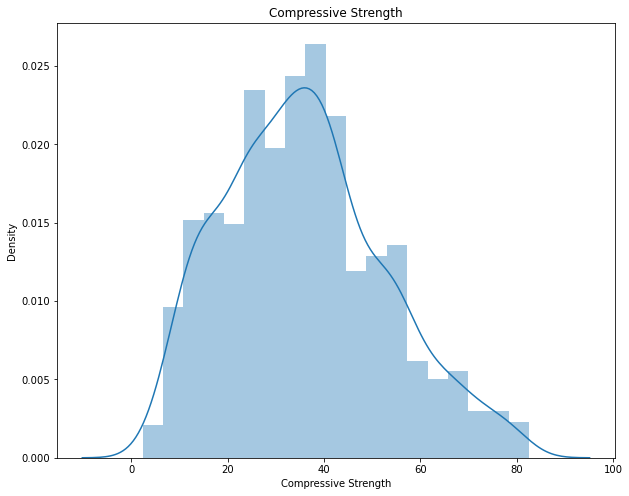

In [17]:
#distplot - Compressive Strength

plt.figure(figsize = (10, 8))
sns.distplot(df['Compressive Strength']).set_title('Compressive Strength')

Note: Values are quite close to normal distribution

In [18]:
'''
fig, ax2 = plt.subplots(3,3, figsize = (16, 16))

sns.violinplot(df['Cement'], ax = ax2[0][0])
sns.violinplot(df['Slag'], ax = ax2[0][1])
sns.violinplot(df['Fly Ash'], ax = ax2[0][2])
sns.violinplot(df['Water'], ax = ax2[1][0])
sns.violinplot(df['Superplasticizer'], ax = ax2[1][1])
sns.violinplot(df['Coarse Aggregate'], ax = ax2[1][2])
sns.violinplot(df['Fine Aggregate'], ax = ax2[2][0])
sns.violinplot(df['Age'], ax = ax2[2][1])
sns.violinplot(df['Compressive Strength'], ax = ax2[2][2])
'''

"\nfig, ax2 = plt.subplots(3,3, figsize = (16, 16))\n\nsns.violinplot(df['Cement'], ax = ax2[0][0])\nsns.violinplot(df['Slag'], ax = ax2[0][1])\nsns.violinplot(df['Fly Ash'], ax = ax2[0][2])\nsns.violinplot(df['Water'], ax = ax2[1][0])\nsns.violinplot(df['Superplasticizer'], ax = ax2[1][1])\nsns.violinplot(df['Coarse Aggregate'], ax = ax2[1][2])\nsns.violinplot(df['Fine Aggregate'], ax = ax2[2][0])\nsns.violinplot(df['Age'], ax = ax2[2][1])\nsns.violinplot(df['Compressive Strength'], ax = ax2[2][2])\n"

<AxesSubplot:>

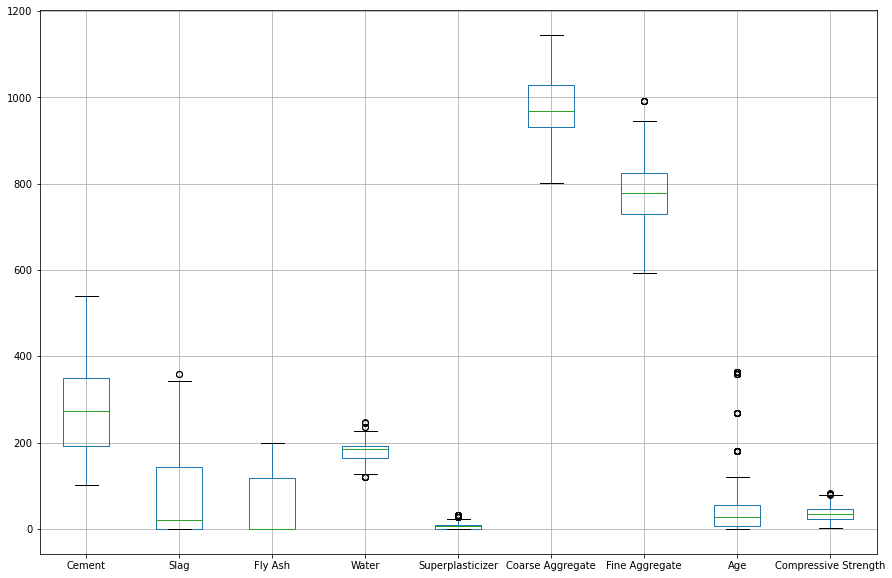

In [19]:
df.boxplot(figsize = (15,10))

**Checking for outliers**

In [20]:
#an outlier if it is larger than 3 std deviation (98%)

c = df[((df.Cement - df.Cement.mean()) / df.Cement.std()).abs() > 3]['Cement'].count()
s = df[((df.Slag - df.Slag.mean()) / df.Slag.std()).abs() > 3]['Slag'].count()
fla = df[((df['Fly Ash'] - df['Fly Ash'].mean()) / df['Fly Ash'].std()).abs() > 3]['Fly Ash'].count()
w = df[((df.Water - df.Water.mean()) / df.Water.std()).abs() > 3]['Water'].count()
sp = df[((df.Superplasticizer - df.Superplasticizer.mean()) / df.Superplasticizer.std()).abs() > 3]['Superplasticizer'].count()
ca = df[((df['Coarse Aggregate'] - df['Coarse Aggregate'].mean()) / df['Coarse Aggregate'].std()).abs() > 3]['Coarse Aggregate'].count()
fa = df[((df['Fine Aggregate'] - df['Fine Aggregate'].mean()) / df['Fine Aggregate'].std()).abs() > 3]['Fine Aggregate'].count()
a = df[((df.Age - df.Age.mean()) / df.Age.std()).abs() > 3]['Age'].count()


print('Outliers in Cement: ', c)
print('Outliers in Slag: ', s)
print('Outliers in Fly Ash: ', fla)
print('Outliers in Water: ', w)
print('Outliers in Superplasticizer: ', sp)
print('Outliers in Coarse Aggregate: ', ca)
print('Outliers in Fine Aggregate: ', fa)
print('Outliers in Age: ', a)

Outliers in Cement:  0
Outliers in Slag:  4
Outliers in Fly Ash:  0
Outliers in Water:  2
Outliers in Superplasticizer:  10
Outliers in Coarse Aggregate:  0
Outliers in Fine Aggregate:  0
Outliers in Age:  33


In [21]:
# Replacing outliers with median of the columns with exception of the strength column... 
#why? ...not use mean values as they are affected by outliers

for cols in df.columns[:-1]:
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    IQR = Q3 - Q1
    
    low = Q1 - 1.5 * IQR #lower limit of data
    high = Q3 + 1.5 * IQR #upper limit of data
    df.loc[(df[cols] < low) | (df[cols] > high), cols] = df[cols].median()

<AxesSubplot:>

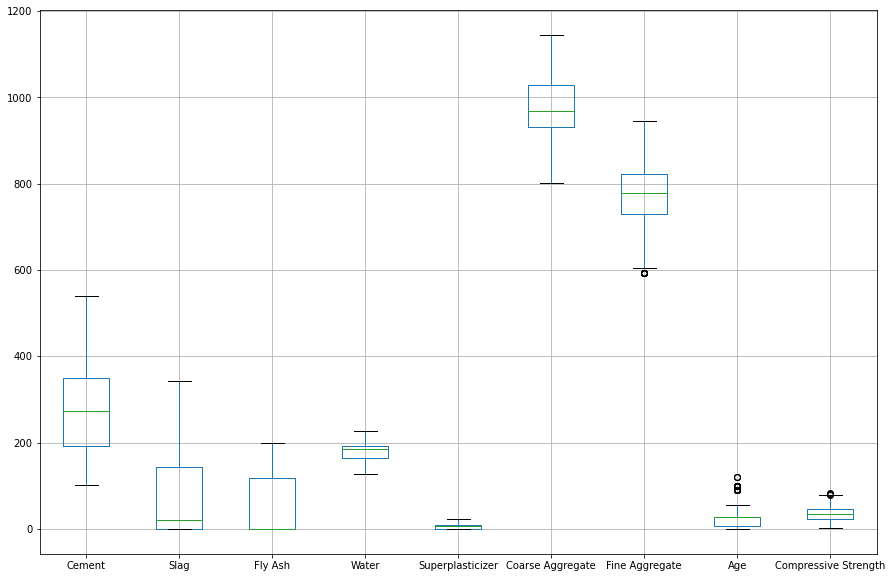

In [22]:
#after replacement
df.boxplot(figsize = (15,10))

In [23]:
#after replacing outliers values
#an outlier if it is larger than 3 std deviation (98%)

c = df[((df.Cement - df.Cement.mean()) / df.Cement.std()).abs() > 3]['Cement'].count()
s = df[((df.Slag - df.Slag.mean()) / df.Slag.std()).abs() > 3]['Slag'].count()
fla = df[((df['Fly Ash'] - df['Fly Ash'].mean()) / df['Fly Ash'].std()).abs() > 3]['Fly Ash'].count()
w = df[((df.Water - df.Water.mean()) / df.Water.std()).abs() > 3]['Water'].count()
sp = df[((df.Superplasticizer - df.Superplasticizer.mean()) / df.Superplasticizer.std()).abs() > 3]['Superplasticizer'].count()
ca = df[((df['Coarse Aggregate'] - df['Coarse Aggregate'].mean()) / df['Coarse Aggregate'].std()).abs() > 3]['Coarse Aggregate'].count()
fa = df[((df['Fine Aggregate'] - df['Fine Aggregate'].mean()) / df['Fine Aggregate'].std()).abs() > 3]['Fine Aggregate'].count()
a = df[((df.Age - df.Age.mean()) / df.Age.std()).abs() > 3]['Age'].count()


print('Outliers in Cement: ', c)
print('Outliers in Slag: ', s)
print('Outliers in Fly Ash: ', fla)
print('Outliers in Water: ', w)
print('Outliers in Superplasticizer: ', sp)
print('Outliers in Coarse Aggregate: ', ca)
print('Outliers in Fine Aggregate: ', fa)
print('Outliers in Age: ', a)

Outliers in Cement:  0
Outliers in Slag:  2
Outliers in Fly Ash:  0
Outliers in Water:  0
Outliers in Superplasticizer:  5
Outliers in Coarse Aggregate:  0
Outliers in Fine Aggregate:  0
Outliers in Age:  3


**MultiVariate Analysis**

<AxesSubplot:xlabel='Compressive Strength', ylabel='Density'>

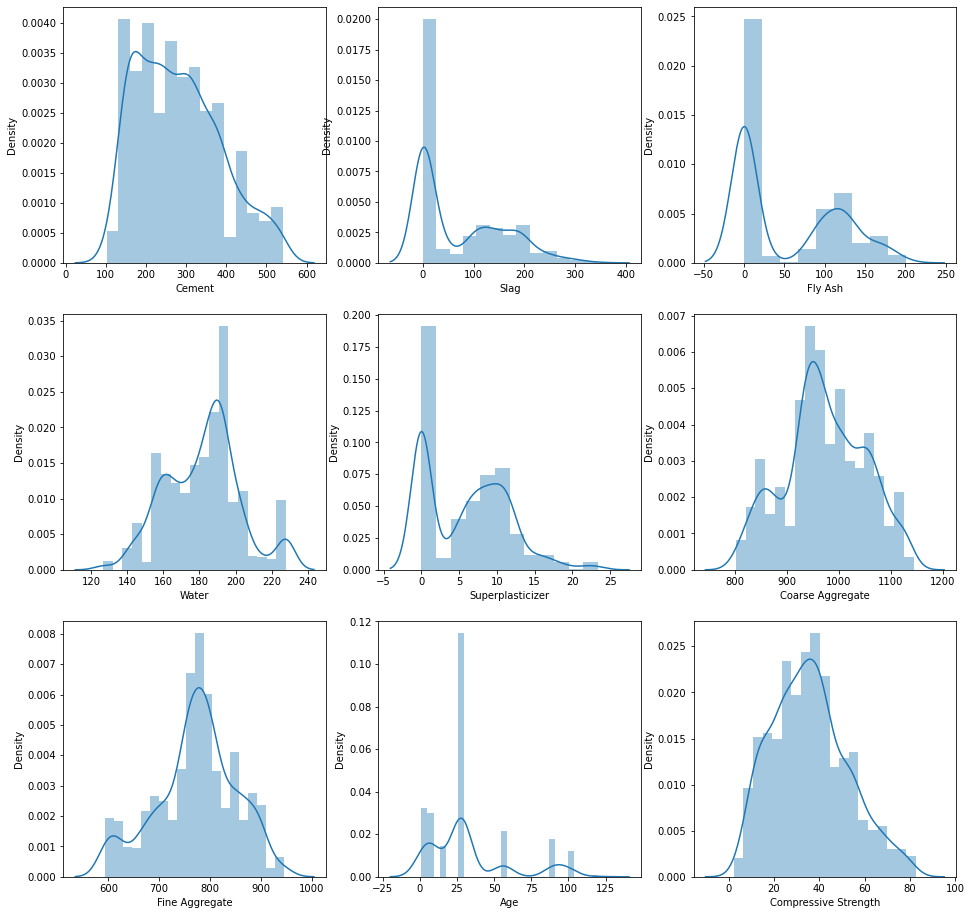

In [24]:
#Distplot: represents the overall distribution of continuous data variables

fig, ax2 = plt.subplots(3,3, figsize = (16, 16))

sns.distplot(df['Cement'], ax = ax2[0][0])
sns.distplot(df['Slag'], ax = ax2[0][1])
sns.distplot(df['Fly Ash'], ax = ax2[0][2])
sns.distplot(df['Water'], ax = ax2[1][0])
sns.distplot(df['Superplasticizer'], ax = ax2[1][1])
sns.distplot(df['Coarse Aggregate'], ax = ax2[1][2])
sns.distplot(df['Fine Aggregate'], ax = ax2[2][0])
sns.distplot(df['Age'], ax = ax2[2][1])
sns.distplot(df['Compressive Strength'], ax = ax2[2][2])

#### What are the observations from the above  plot?

Cement is almost normal.

Slag has 3 Gaussians and rightly skewed

Fly Ash has 2 Gaussians and slightly left skewed

Water has 3 Gaussians and slightly left skewed

Superplastic has 2 Gaussians and slightly right skewed

Coarse Aggregate has 3 Gaussians and almost normal

Fine Aggregate has almost 2 Gaussians and looks like normal

Age has multiple Gaussians and rightly skewed

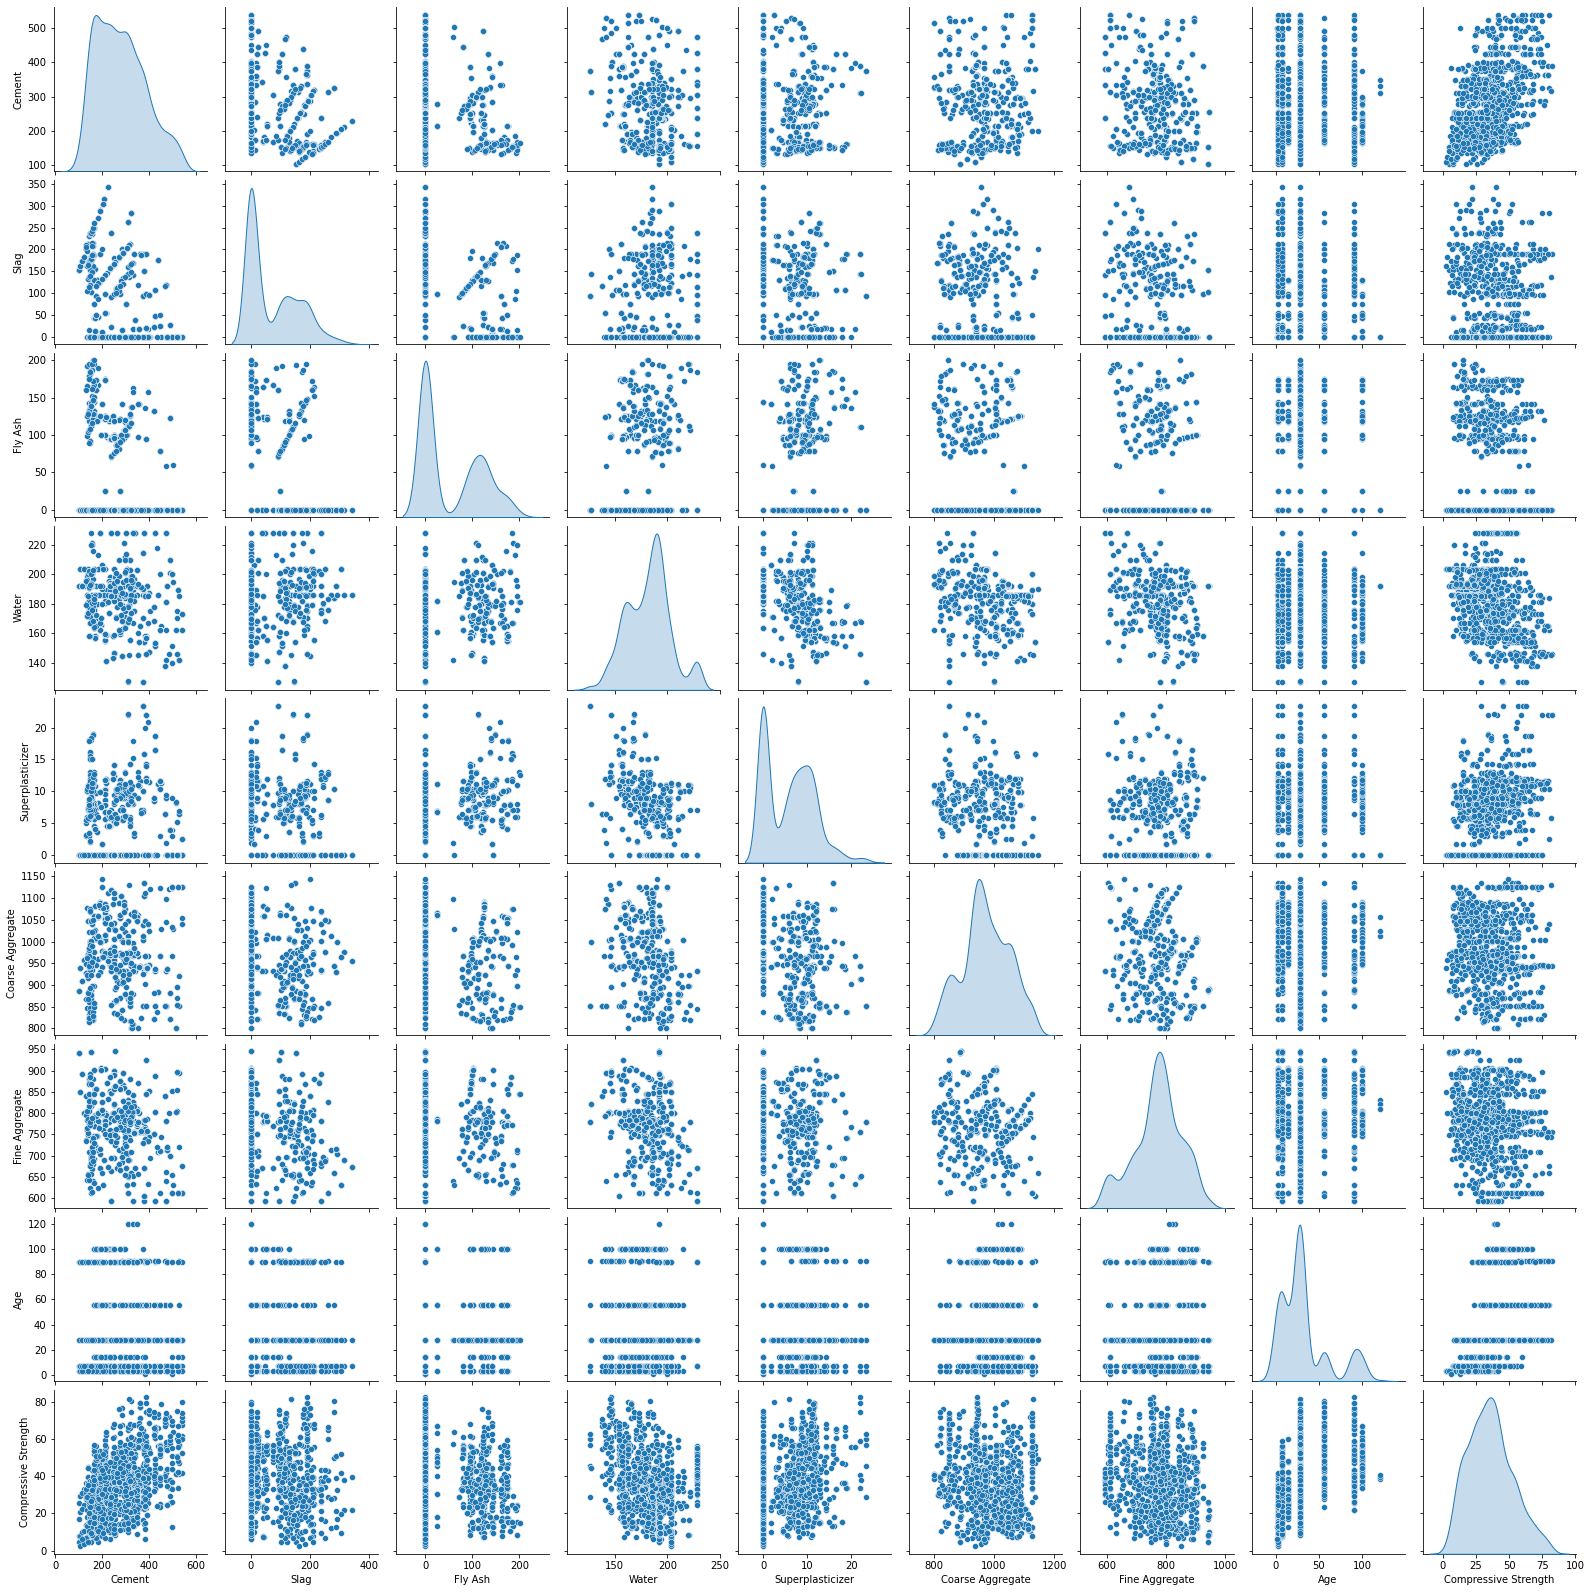

In [25]:
#pairplot - plot density curve instead of histogram in diagonal

sns.pairplot(df, diag_kind = 'kde')
plt.show()

Note: Correlation is not visibly apparent in the pairplot between any 2 features. Cement and Compressive strength however show some sort of correlation. Let's check the Pearson Correlation to determine the numerical value between the features.

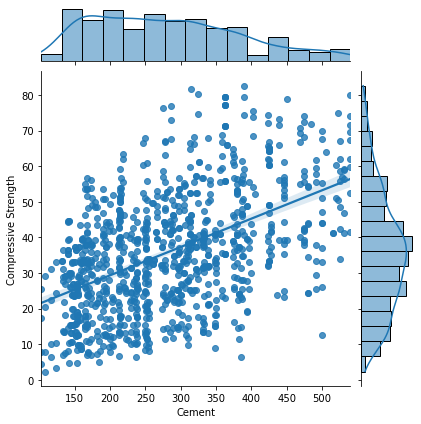

In [26]:
# visualize the correlation between an independent variable and the dependent variable
_ = sns.jointplot(x="Cement", y="Compressive Strength", data=df, kind="reg")

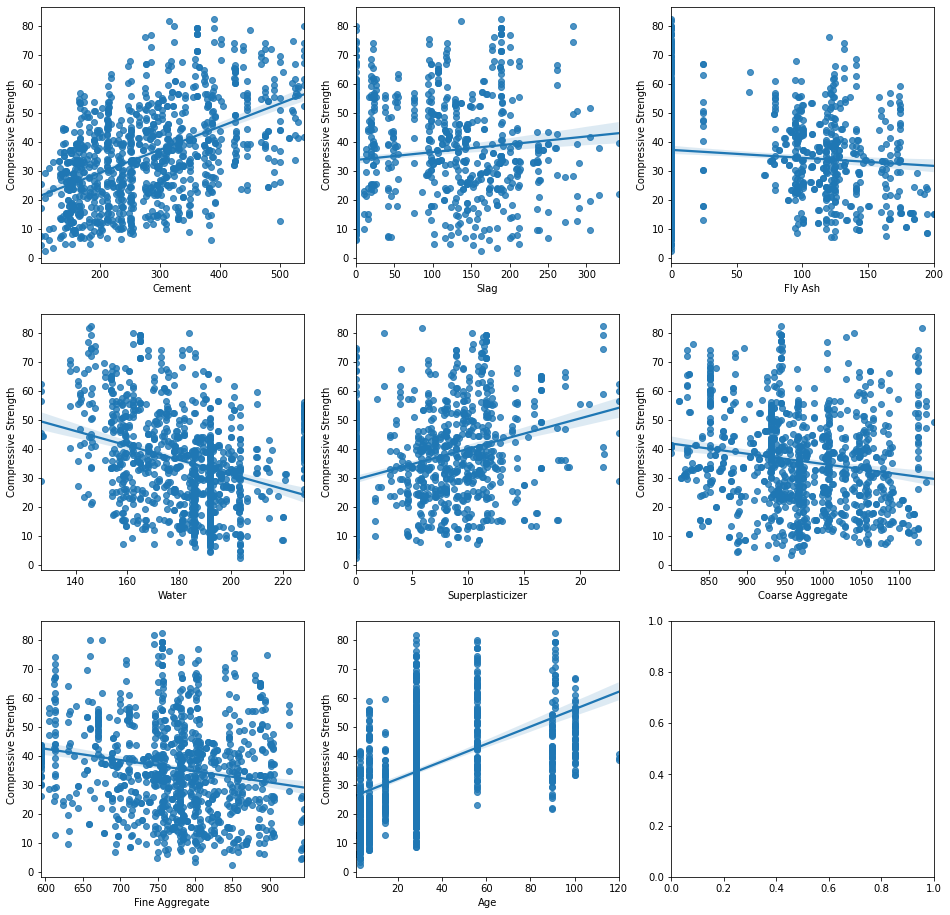

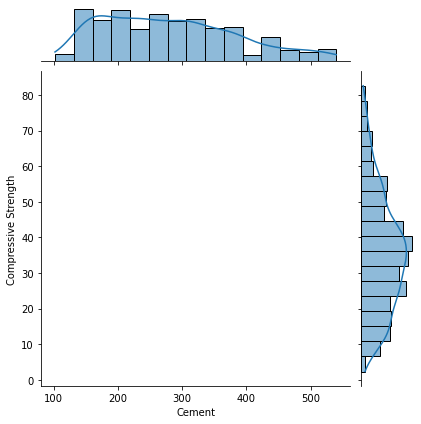

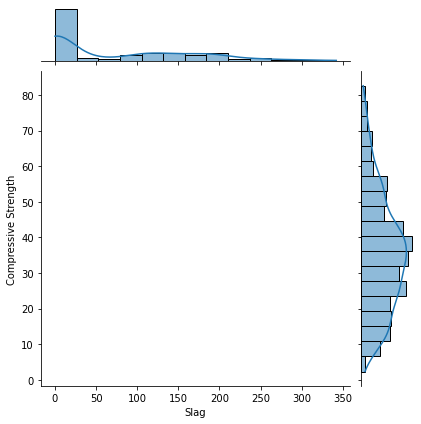

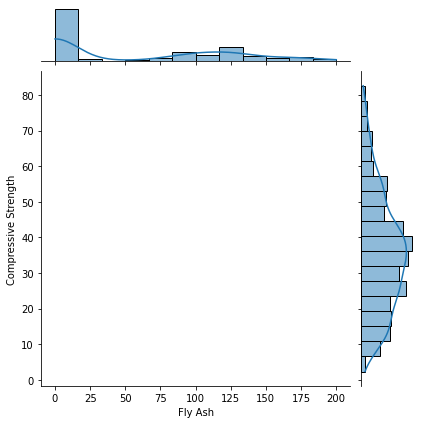

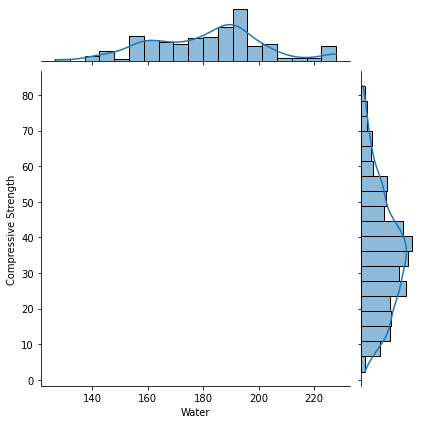

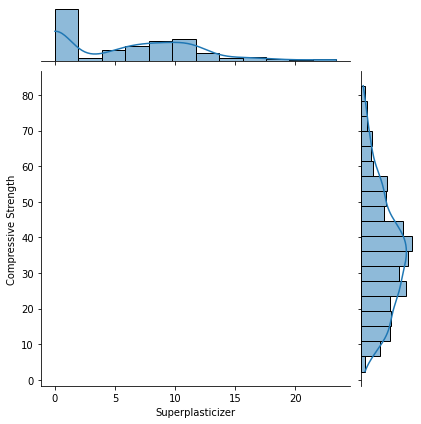

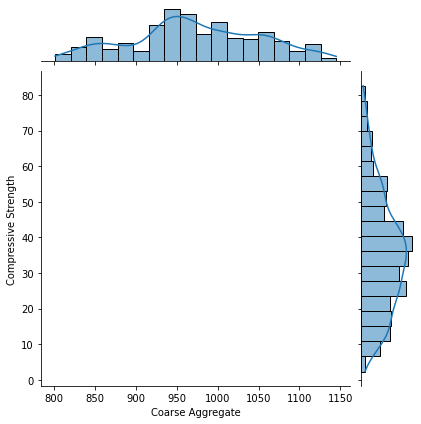

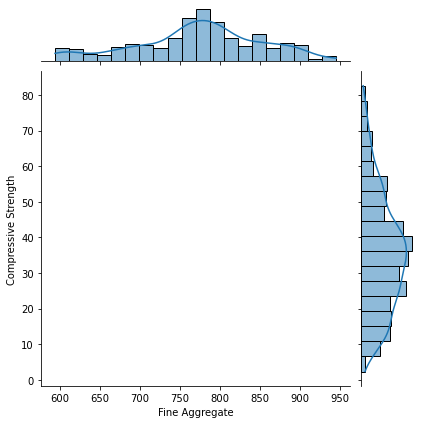

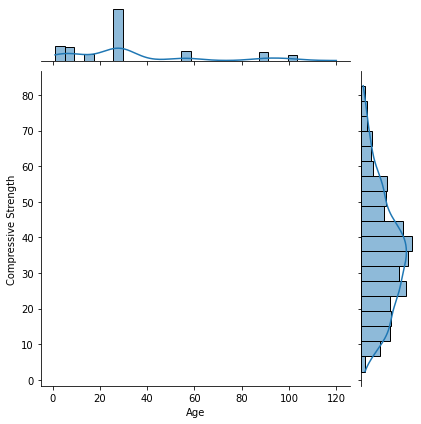

In [27]:
fig, ax2 = plt.subplots(3,3, figsize = (16, 16))

sns.jointplot(x="Cement", y="Compressive Strength", data=df, kind="reg", ax = ax2[0][0])
sns.jointplot(x="Slag", y="Compressive Strength", data=df, kind="reg", ax = ax2[0][1])
sns.jointplot(x="Fly Ash", y="Compressive Strength", data=df, kind="reg", ax = ax2[0][2])
sns.jointplot(x="Water", y="Compressive Strength", data=df, kind="reg", ax = ax2[1][0])
sns.jointplot(x="Superplasticizer", y="Compressive Strength", data=df, kind="reg", ax = ax2[1][1])
sns.jointplot(x="Coarse Aggregate", y="Compressive Strength", data=df, kind="reg", ax = ax2[1][2])
sns.jointplot(x="Fine Aggregate", y="Compressive Strength", data=df, kind="reg", ax = ax2[2][0])
sns.jointplot(x="Age", y="Compressive Strength", data=df, kind="reg", ax = ax2[2][1])


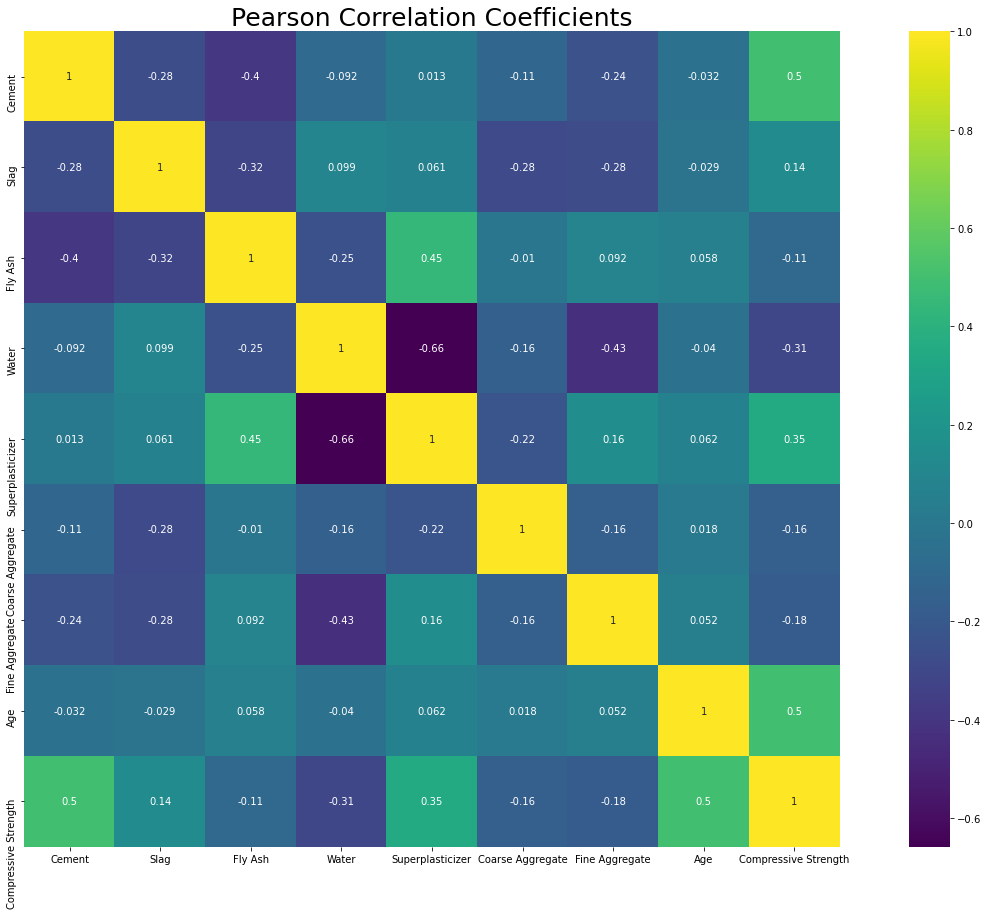

In [28]:
# correlation matrix heatmap visualization

plt.figure(figsize = (25, 15))

corr = df.corr()

sns.heatmap(corr, vmax = 1, square = True, annot = True, cmap = 'viridis')
plt.title('Pearson Correlation Coefficients', fontsize = 25)
plt.show()

As expected, the highest positive correlations is between Compressive Strength and Cement.

Age and Superplasticizer also have a positive impact on the Compressive Strength.

By sorting for the largest magnitude values (both positive and negative) we can focus on the strong correlations with the target variable, and the strong correlations between other features.

In [29]:
corr_sorted = corr.unstack().sort_values(kind='quicksort', ascending = False)
print(corr_sorted[corr_sorted!=1].head(10))
print()
print(corr_sorted[corr_sorted!=1].tail(10))

Compressive Strength  Age                     0.499850
Age                   Compressive Strength    0.499850
Cement                Compressive Strength    0.497832
Compressive Strength  Cement                  0.497832
Superplasticizer      Fly Ash                 0.447492
Fly Ash               Superplasticizer        0.447492
Compressive Strength  Superplasticizer        0.346260
Superplasticizer      Compressive Strength    0.346260
                      Fine Aggregate          0.156591
Fine Aggregate        Superplasticizer        0.156591
dtype: float64

Compressive Strength  Water                  -0.307711
Water                 Compressive Strength   -0.307711
Fly Ash               Slag                   -0.320468
Slag                  Fly Ash                -0.320468
Cement                Fly Ash                -0.397467
Fly Ash               Cement                 -0.397467
Fine Aggregate        Water                  -0.426299
Water                 Fine Aggregate         -0.4

As expected, the highest positive correlations is between Compressive Strength and Age followed by Compressive Strength and Cement.

Superplasticizer also have a positive impact on the Compressive Strength.

By sorting for the largest magnitude values (both positive and negative) we can focus on the strong correlations with the target variable, and the strong correlations between other features.

### Step 3: Preparing the data for training and testing

1) Divide our independent and dependent variable into two separate variables.

2) Split the data into training and testing datasets.

In [30]:
df.head()

,Cement,Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Compressive Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,28,44.30


In [31]:
#splitting the data into independent and dependent attributes

#independent variables
X = df.drop(['Compressive Strength', 'Water'], axis = 1)

#dependent variable
y = df['Compressive Strength']

## Splitting the dataset into the Training set and Test set

In [32]:
from sklearn.model_selection import train_test_split
from scipy.stats import zscore

In [33]:
X_scaled = X.apply(zscore)
X_scaled_df = pd.DataFrame(X_scaled, columns = df.columns)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Step 4: Training the model 1 - Linear Regression

In [35]:
# Import the linear regression algorithm
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

# Train the model
regressor.fit(X_train, y_train)

LinearRegression()

### Step 5: Testing the model

In [36]:
# Kept aside some data to test - X_test
y_pred = regressor.predict(X_test)

compare_df = pd.DataFrame({"Desired Compressive Strength (Actuals)": y_test, 
                           "Predicted Compressive Strength": y_pred})

compare_df

,Desired Compressive Strength (Actuals),Predicted Compressive Strength
31,52.91,27.239394
109,55.90,47.603106
136,74.50,62.735170
88,35.30,46.377322
918,10.54,18.266455
...,...,...
482,56.14,61.421069
545,18.75,19.590300
110,38.00,41.270095
514,74.36,58.314820


### Step 6: Evaluate the model

In [37]:
# The coefficients
print('Coefficients: \n', regressor.coef_)

# The ROOT mean squared error
rmse = mean_squared_error(y_test, y_pred)**(1/2)
print('R Mean squared error: {:.2f}', rmse)

#The absolute mean squared error
mae = mean_absolute_error(y_test, y_pred)
print('Mean absolute error: {:.2f}', mae)

# The mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error: {:.2f}'.format(mse))

# The coefficient of determination: 1 is perfect prediction
r2 = r2_score(y_test, y_pred)
print('Coefficient of determination: {:.2f}'.format(r2))

Coefficients: 
 [12.75215393  8.10620464  3.82077473  2.82350496  1.46786828  1.52153122
  8.51620189]
R Mean squared error: {:.2f} 8.93930550130989
Mean absolute error: {:.2f} 6.945755195625671
Mean squared error: 79.91
Coefficient of determination: 0.69


In [38]:
# Evaluate the model's training score and test score
print("Regression model's training score = {:.2f}".format(regressor.score(X_train, y_train)))
print("Regression model's test score     = {:.2f}".format(regressor.score(X_test, y_test)))

Regression model's training score = 0.71
Regression model's test score     = 0.69


Note: 
1. training score > test score --> possibility of model overfit
2. To avoid overfitting, we can use cross-validation method to evaluate models used for prediction

**K-Fold Cross Validation - Linear Regression**

In [39]:
from sklearn.model_selection import KFold, cross_val_score

k = 20

kfold = KFold(n_splits = k, random_state = 70)
K_results_1 = cross_val_score(regressor, X, y, cv = kfold, scoring = 'neg_mean_squared_error')
lr_accuracy = np.mean(abs(K_results_1))

print(lr_accuracy)

91.59350753991626


In [40]:
#Store the error results for each model in a dataframe for final comparison

results_2 = pd.DataFrame({'Algorithm' : ['Linear Regressor'], 'R2 Score' : r2, 'MSE' : mse, 'MAE' : mae, 'K-Fold (MSE)' : lr_accuracy}, index = {'1'})
results = results_2[['Algorithm', 'R2 Score', 'MSE', 'MAE', 'K-Fold (MSE)']]

results

,Algorithm,R2 Score,MSE,MAE,K-Fold (MSE)
1,Linear Regressor,0.689878,79.911183,6.945755,91.593508


To avoid overfitting, we can use cross-validation method to evaluate models used for prediction. We can also use ridge, lasso and elastic net regressions techniques to correct overfitting issue.

### Step 4: Training the model 2 - Ridge Regressor

In [41]:
# Import the linear model algorithms
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV

#Train the model
ridge_alpha = RidgeCV(cv=10)
ridge_alpha.fit(X_train, y_train)
alpha = ridge_alpha.alpha_

ridge = Ridge(alpha=alpha, random_state=42)
ridge.fit(X_train, y_train)

Ridge(random_state=42)

### Step 5: Testing the model

In [42]:
y_pred = ridge.predict(X_test)

In [43]:
compare_df = pd.DataFrame({"Desired Compressive Strength (Actuals)": y_test, 
                           "Predicted Compressive Strength": y_pred})
compare_df 

,Desired Compressive Strength (Actuals),Predicted Compressive Strength
31,52.91,27.323974
109,55.90,47.558937
136,74.50,62.733998
88,35.30,46.334599
918,10.54,18.320013
...,...,...
482,56.14,61.376270
545,18.75,19.641646
110,38.00,41.215787
514,74.36,58.247106


### Step 6: Evaluate the model

In [44]:
# The coefficients
print('Coefficients: \n', ridge.coef_)

# The mean squared error
print('Mean squared error: {:.2f}'.format(mean_squared_error(y_test, y_pred)))

# The coefficient of determination: 1 is perfect prediction
r2 = r2_score(y_test, y_pred)
print('Coefficient of determination: {:.2f}'.format(r2))

Coefficients: 
 [12.66522328  8.01934528  3.7402473   2.86209676  1.43191317  1.47063127
  8.50615001]
Mean squared error: 79.91
Coefficient of determination: 0.69


In [45]:
# Evaluate the model's training score and test score
print("Regression model's training score = {:.2f}".format(ridge.score(X_train, y_train)))
print("Regression model's test score     = {:.2f}".format(ridge.score(X_test, y_test)))

Regression model's training score = 0.71
Regression model's test score     = 0.69


**K-Fold Cross Validation - Ridge Regression**

In [46]:
k = 20

kfold = KFold(n_splits = k, random_state = 70)
results_k3 = cross_val_score(ridge, X, y, cv = kfold, scoring = 'neg_mean_squared_error')
r_accuracy = np.mean(abs(results_k3))

print(r_accuracy)

91.59343348429867


In [47]:
#Store the accuracy results for each model in a dataframe for final comparison

results_4 = pd.DataFrame({'Algorithm' : ['Ridge Regressor'], 'R2 Score' : r2, 'MSE' : mse, 'MAE' : mae, 'K-Fold (MSE)' : r_accuracy}, index = {'2'})
results = pd.concat([results, results_4])
results = results[['Algorithm', 'R2 Score', 'MSE', 'MAE', 'K-Fold (MSE)']]



results

,Algorithm,R2 Score,MSE,MAE,K-Fold (MSE)
1,Linear Regressor,0.689878,79.911183,6.945755,91.593508
2,Ridge Regressor,0.689888,79.911183,6.945755,91.593433


### Step 4: Training the model 3 - Lasso Regressor

In [48]:
#Train the model

lasso_alpha = LassoCV(cv=10)
lasso_alpha.fit(X_train, y_train)
alpha = lasso_alpha.alpha_

lasso = Lasso(alpha=alpha, random_state=42)
lasso.fit(X_train, y_train)

Lasso(alpha=0.008613256138835, random_state=42)

### Step 5: Testing the model

In [49]:
y_pred = lasso.predict(X_test)

In [50]:
compare_df = pd.DataFrame({"Desired Compressive Strength (Actuals)": y_test, 
                           "Predicted Compressive Strength": y_pred})
compare_df 

,Desired Compressive Strength (Actuals),Predicted Compressive Strength
31,52.91,27.345691
109,55.90,47.553710
136,74.50,62.721305
88,35.30,46.328986
918,10.54,18.325455
...,...,...
482,56.14,61.384235
545,18.75,19.643959
110,38.00,41.195811
514,74.36,58.271607


### Step 6: Evaluate the model

In [51]:
# The coefficients
print('Coefficients: \n', lasso.coef_)

# The ROOT mean squared error
rmse = mean_squared_error(y_test, y_pred)**(1/2)
print('R Mean squared error: {:.2f}', rmse)

#The absolute mean squared error
mae = mean_absolute_error(y_test, y_pred)
print('Mean absolute error: {:.2f}', mae)

# The mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error: {:.2f}'.format(mse))

# The coefficient of determination: 1 is perfect prediction
r2 = r2_score(y_test, y_pred)
print('Coefficient of determination: {:.2f}'.format(r2))

Coefficients: 
 [12.6664244   8.01510587  3.73821671  2.85693434  1.42115044  1.46182536
  8.50883231]
R Mean squared error: {:.2f} 8.939809002089596
Mean absolute error: {:.2f} 6.951395151758194
Mean squared error: 79.92
Coefficient of determination: 0.69


In [52]:
# Evaluate the model's training score and test score
print("Regression model's training score = {:.2f}".format(lasso.score(X_train, y_train)))
print("Regression model's test score     = {:.2f}".format(lasso.score(X_test, y_test)))

Regression model's training score = 0.71
Regression model's test score     = 0.69


**K-Fold Cross Validation - Lasso Regression**

In [53]:
k = 20

kfold = KFold(n_splits = k, random_state = 70)
results_5 = cross_val_score(lasso, X, y, cv = kfold, scoring = 'neg_mean_squared_error')
laccuracy = np.mean(abs(results_5))

print(laccuracy)

91.5939439498874


In [54]:
#Store the accuracy results for each model in a dataframe for final comparison

results_6 = pd.DataFrame({'Algorithm' : ['Lasso Regressor'], 'R2 Score' : r2, 'MSE' : mse, 'MAE' : mae, 'K-Fold (MSE)' : laccuracy}, index = {'3'})
results = pd.concat([results, results_6])
results = results[['Algorithm', 'R2 Score', 'MSE', 'MAE', 'K-Fold (MSE)']]



results

,Algorithm,R2 Score,MSE,MAE,K-Fold (MSE)
1,Linear Regressor,0.689878,79.911183,6.945755,91.593508
2,Ridge Regressor,0.689888,79.911183,6.945755,91.593433
3,Lasso Regressor,0.689843,79.920185,6.951395,91.593944


### Step 4: Training the model 4 - Random Forest

In [55]:
# Import the linear regression algorithm
from sklearn.ensemble import RandomForestRegressor

rlf = RandomForestRegressor()

# Train the model
#model.fit(X_train, y_train)

In [56]:
# Hyperparameter tuning using K-fold cross validation
# ... via Grid Search method
from sklearn.model_selection import GridSearchCV
#default: n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1
param_grid = {'n_estimators' : [100, 200, 300],
              'max_depth': [5, 10, 25, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5,10]}

gs_rlf = GridSearchCV(rlf,
                      param_grid, 
                      cv=5,
                      scoring='neg_mean_squared_error',
                      n_jobs=-1)
gs_rlf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 25, None],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [57]:
gs_rlf.best_estimator_ #get parameters of the model

RandomForestRegressor(max_depth=25, n_estimators=200)

In [58]:
reg = gs_rlf.best_estimator_
reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=25, n_estimators=200)

### Step 5: Testing the model

In [59]:
y_pred = reg.predict(X_test)

In [60]:
compare_df = pd.DataFrame({"Desired Compressive Strength (Actuals)": y_test, 
                           "Predicted Compressive Strength": y_pred})
compare_df 

,Desired Compressive Strength (Actuals),Predicted Compressive Strength
31,52.91,48.396508
109,55.90,39.586964
136,74.50,70.148800
88,35.30,34.782850
918,10.54,11.944250
...,...,...
482,56.14,55.121958
545,18.75,27.040198
110,38.00,33.197450
514,74.36,68.092950


### Step 6: Evaluate the model

In [61]:
# The coefficients : There are no coefficients from a random forest model, they have no meaningful interpretation. 
#You can only get coefficients for linear models.
#print('Coefficients: \n', model.coef_)

In [62]:
# The ROOT mean squared error
rmse = mean_squared_error(y_test, y_pred)**(1/2)
print('R Mean squared error: {:.2f}', rmse)

#The absolute mean squared error
mae = mean_absolute_error(y_test, y_pred)
print('Mean absolute error: {:.2f}', mae)

# The mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error: {:.2f}'.format(mse))

# The coefficient of determination: 1 is perfect prediction
r2 = r2_score(y_test, y_pred)
print('Coefficient of determination: {:.2f}'.format(r2))

R Mean squared error: {:.2f} 5.91519663753073
Mean absolute error: {:.2f} 4.177126304804284
Mean squared error: 34.99
Coefficient of determination: 0.86


In [63]:
# Evaluate the model's training score and test score
print("Regression model's training score = {:.2f}".format(reg.score(X_train, y_train)))
print("Regression model's test score     = {:.2f}".format(reg.score(X_test, y_test)))

Regression model's training score = 0.98
Regression model's test score     = 0.86


**K-Fold Cross Validation - Random Forest**

In [64]:
k = 20

kfold = KFold(n_splits = k, random_state = 70)
K_results_7 = cross_val_score(reg, X, y, cv = kfold, scoring = 'neg_mean_squared_error')
rfaccuracy = np.mean(abs(K_results_7))

print(rfaccuracy)

43.87737536523586


In [65]:
#Store the accuracy results for each model in a dataframe for final comparison

results_8 = pd.DataFrame({'Algorithm' : ['Random Forest Regressor'], 'R2 Score' : r2, 'MSE' : mse, 'MAE' : mae, 'K-Fold (MSE)' : rfaccuracy}, index = {'4'})
results = pd.concat([results, results_8])
results = results[['Algorithm', 'R2 Score', 'MSE', 'MAE', 'K-Fold (MSE)']]

results

,Algorithm,R2 Score,MSE,MAE,K-Fold (MSE)
1,Linear Regressor,0.689878,79.911183,6.945755,91.593508
2,Ridge Regressor,0.689888,79.911183,6.945755,91.593433
3,Lasso Regressor,0.689843,79.920185,6.951395,91.593944
4,Random Forest Regressor,0.864212,34.989551,4.177126,43.877375


### Step 4: Training the model 5 - SVM Regressor

In [66]:
# Import the Support vector regressor algorithm
from sklearn.svm import SVR

sv_regressor = SVR(kernel = 'linear')

# Train the model
sv_regressor.fit(X_train, y_train)

SVR(kernel='linear')

### Step 5: Testing the model

In [67]:
y_pred = sv_regressor.predict(X_test)

In [68]:
compare_df = pd.DataFrame({"Desired Compressive Strength (Actuals)": y_test, 
                           "Predicted Compressive Strength": y_pred})
compare_df 

,Desired Compressive Strength (Actuals),Predicted Compressive Strength
31,52.91,26.997207
109,55.90,46.111359
136,74.50,61.986949
88,35.30,44.897914
918,10.54,18.597445
...,...,...
482,56.14,60.828685
545,18.75,19.097128
110,38.00,39.361103
514,74.36,57.773501


### Step 6: Evaluate the model

In [69]:
# The coefficients
print('Coefficients: \n', sv_regressor.coef_)

# The ROOT mean squared error
rmse = mean_squared_error(y_test, y_pred)**(1/2)
print('R Mean squared error: {:.2f}', rmse)

#The absolute mean squared error
mae = mean_absolute_error(y_test, y_pred)
print('Mean absolute error: {:.2f}', mae)

# The mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error: {:.2f}'.format(mse))

# The coefficient of determination: 1 is perfect prediction
r2 = r2_score(y_test, y_pred)
print('Coefficient of determination: {:.2f}'.format(r2))

Coefficients: 
 [[12.01586658  6.96376511  3.2012233   3.350289    0.966043    0.9130732
   8.43047512]]
R Mean squared error: {:.2f} 9.043527318346458
Mean absolute error: {:.2f} 6.920478698771427
Mean squared error: 81.79
Coefficient of determination: 0.68


In [70]:
# Evaluate the model's training score and test score
print("Regression model's training score = {:.2f}".format(sv_regressor.score(X_train, y_train)))
print("Regression model's test score     = {:.2f}".format(sv_regressor.score(X_test, y_test)))

Regression model's training score = 0.71
Regression model's test score     = 0.68


**K-Fold Cross Validation - SV Regression**

In [71]:
k = 10 #cuz it takes long time

kfold = KFold(n_splits = k, random_state = 70)
K_results_9 = cross_val_score(sv_regressor, X, y, cv = kfold, scoring = 'neg_mean_squared_error')
svaccuracy = np.mean(abs(K_results_9))

print(svaccuracy)

97.97538886053731


In [72]:
#Store the accuracy results for each model in a dataframe for final comparison

results_10 = pd.DataFrame({'Algorithm' : ['SV Regressor'], 'R2 Score' : r2, 'MSE' : mse, 'MAE' : mae, 'K-Fold (MSE)' : svaccuracy}, index = {'5'})
results = pd.concat([results, results_10])
results = results[['Algorithm', 'R2 Score', 'MSE', 'MAE', 'K-Fold (MSE)']]



results

,Algorithm,R2 Score,MSE,MAE,K-Fold (MSE)
1,Linear Regressor,0.689878,79.911183,6.945755,91.593508
2,Ridge Regressor,0.689888,79.911183,6.945755,91.593433
3,Lasso Regressor,0.689843,79.920185,6.951395,91.593944
4,Random Forest Regressor,0.864212,34.989551,4.177126,43.877375
5,SV Regressor,0.682605,81.785386,6.920479,97.975389


### Step 4: Training the model 6 - KNN

In [73]:
#Checking for different values of neighbors to determine optimum k
# Import the KNN regression algorithm

from sklearn.neighbors import KNeighborsRegressor

diff_k = []
for i in range(1, 45):
    knn = KNeighborsRegressor(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    diff_k.append(np.mean(pred_i != y_test))
    


Text(0, 0.5, 'Mean Error')

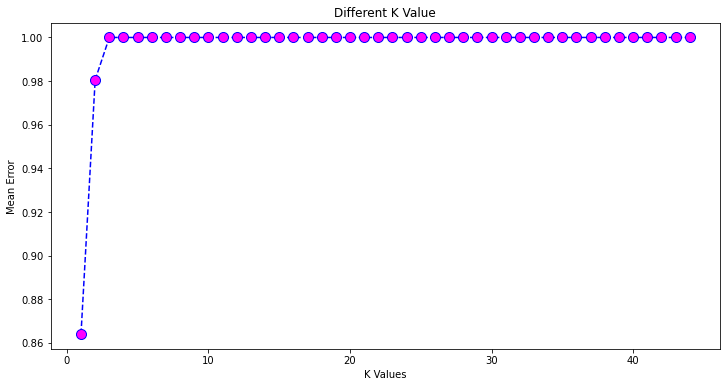

In [74]:
plt.figure(figsize = (12, 6))
plt.plot(range(1, 45), diff_k, color = 'blue', linestyle = 'dashed', marker = 'o', markerfacecolor = 'magenta', markersize = 10)
plt.title('Different K Value')
plt.xlabel('K Values')
plt.ylabel('Mean Error')

In [75]:
#k = 3 is a better choice from the above plot

knn_model = KNeighborsRegressor(n_neighbors = 3)
#Train the knn_model
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

### Step 5: Testing the model

In [76]:
y_pred = knn_model.predict(X_test)

In [77]:
compare_df = pd.DataFrame({"Desired Compressive Strength (Actuals)": y_test, 
                           "Predicted Compressive Strength": y_pred})
compare_df 

,Desired Compressive Strength (Actuals),Predicted Compressive Strength
31,52.91,48.760000
109,55.90,38.033333
136,74.50,59.696667
88,35.30,31.166667
918,10.54,10.006667
...,...,...
482,56.14,51.480000
545,18.75,16.796667
110,38.00,42.400000
514,74.36,66.616667


### Step 6: Evaluate the model

In [78]:
# The coefficients
#print('Coefficients: \n', knn_model.coef_)

# The ROOT mean squared error
rmse = mean_squared_error(y_test, y_pred)**(1/2)
print('R Mean squared error: {:.2f}', rmse)

#The absolute mean squared error
mae = mean_absolute_error(y_test, y_pred)
print('Mean absolute error: {:.2f}', mae)

# The mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error: {:.2f}'.format(mse)) #using testing data

# The coefficient of determination: 1 is perfect prediction
r2 = r2_score(y_test, y_pred)
print('Coefficient of determination: {:.2f}'.format(r2))

R Mean squared error: {:.2f} 7.391953827749857
Mean absolute error: {:.2f} 5.5651941747572815
Mean squared error: 54.64
Coefficient of determination: 0.79


In [79]:
# Evaluate the model's training score and test score
print("Regression model's training score = {:.2f}".format(knn_model.score(X_train, y_train)))
print("Regression model's test score     = {:.2f}".format(knn_model.score(X_test, y_test)))

Regression model's training score = 0.91
Regression model's test score     = 0.79


**K-Fold Cross Validation - KNN**

In [80]:
k = 20 #using trg data

kfold = KFold(n_splits = k, random_state = 70)
results_11 = cross_val_score(knn_model, X, y, cv = kfold, scoring = 'neg_mean_squared_error')

kaccuracy = np.mean(abs(results_11))

print(kaccuracy)

127.09939715644377


In [81]:
#Store the accuracy results for each model in a dataframe for final comparison

results_12 = pd.DataFrame({'Algorithm' : ['KNN Regressor'], 'R2 Score' : r2, 'MSE' : mse, 'MAE' : mae, 'K-Fold (MSE)' : kaccuracy}, index = {'6'})
results = pd.concat([results, results_12])
results = results[['Algorithm', 'R2 Score', 'MSE', 'MAE', 'K-Fold (MSE)']]


results



,Algorithm,R2 Score,MSE,MAE,K-Fold (MSE)
1,Linear Regressor,0.689878,79.911183,6.945755,91.593508
2,Ridge Regressor,0.689888,79.911183,6.945755,91.593433
3,Lasso Regressor,0.689843,79.920185,6.951395,91.593944
4,Random Forest Regressor,0.864212,34.989551,4.177126,43.877375
5,SV Regressor,0.682605,81.785386,6.920479,97.975389
6,KNN Regressor,0.787948,54.640981,5.565194,127.099397


punish data more if MSE is larger

In [89]:
print((df['Slag'] == 0).sum())

471


In [90]:
print((df['Fly Ash'] == 0).sum())

566


In [91]:
print((df['Coarse Aggregate'] == 0).sum())

0


In [92]:
print((df['Fine Aggregate'] == 0).sum())

0


In [82]:
# get importance
importance = regressor.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 12.75215
Feature: 1, Score: 8.10620
Feature: 2, Score: 3.82077
Feature: 3, Score: 2.82350
Feature: 4, Score: 1.46787
Feature: 5, Score: 1.52153
Feature: 6, Score: 8.51620
